In [29]:
from astropy.table import Table, vstack
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
from scipy.stats import gaussian_kde
import seaborn as sns
from scipy import stats
import pandas as pd

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [201]:
def median(x,y,group_size=500):
    array = np.transpose(np.vstack([x,y]))
    array=array[array[:,0].argsort()]
    index = 0

    x_list = np.array([])
    y_median_list = np.array([])
    while index < len(cat) - group_size:
        array_slice =array[index: index + group_size - 1]
        x_median = np.median(array_slice[:,0])
        y_median = np.median(array_slice[:,1])
        index = index + group_size
    
        x_list = np.append(x_list,x_median)
        y_median_list = np.append(y_median_list,y_median)

    array_slice = array[index: -1]
    x_median = np.median(array_slice[:,0])
    y_median = np.median(array_slice[:,1] )

    x_list = np.append(x_list,x_median)
    y_median_list = np.append(y_median_list,y_median)
    
    return x_list,y_median_list

### COSMOS2015 matched table

In [251]:
cat = Table.read('CUT_deep_catalogs/COSMOS2015_CLAUDS_matched.fits')
# '_1' --old parameters
# '_2' --new parameters
# '' --COSMOS parameters

/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[-0.007  0.019  0.003 -0.002 -0.024 -0.036 -0.052 -0.041 -0.066 -0.071
 -0.086 -0.084 -0.089 -0.088 -0.148    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan]


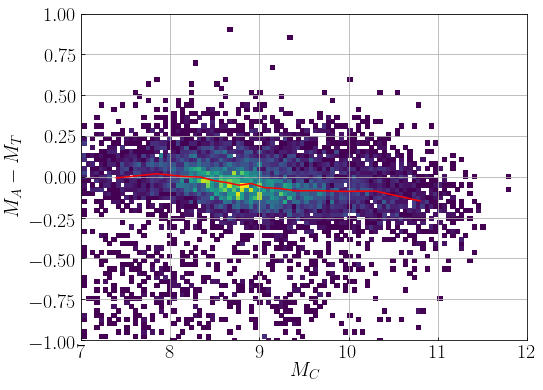

In [249]:
# cat_cut = cat[np.logical_and(cat['CLASS_2']<10,abs(cat['zKDEPeak_1']-cat['Z_BEST_BC03'])<0.05*cat['Z_BEST_BC03'])] 
cat_cut = cat[np.logical_and(cat['CLASS_2']<10,abs(cat['Z_BEST_BC03']-0.8)<0.1)]
# cat_cut = cat[np.logical_and(cat['preds_median_1']<0.89,abs(cat['zKDEPeak_1']-0.4)<0.1)]
# cat_cut = cat_cut[cat_cut['sfProb_1']<0.5]

fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))
x = np.array(cat_cut['MASS_MED'])
y = np.array(cat_cut['MASS_MED_1']-cat_cut['MASS_MED_2'])

y = y[np.logical_and(x>7,x<12)]
x = x[np.logical_and(x>7,x<12)]

x = x[np.logical_and(y>-3,y<3)]
y = y[np.logical_and(y>-3,y<3)]
x_list,y_median = median(x,y)

# # plot
plt.hist2d(x,y,bins=[100,100],cmin=0.1)
plt.plot(x_list,y_median,'r')

plt.xlim([7,12])
plt.ylim([-1,1])
plt.xlabel(r'$M_C$', fontsize=20)
plt.ylabel(r'$M_A-M_T$', fontsize=20)
plt.grid()
# plt.show(); plt.close()
print(y_median)


### matched table in ELAIS

In [206]:
cat = Table.read('CUT_deep_catalogs/s16a_DEEP_deep_masterCat_newz2.fits')

/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


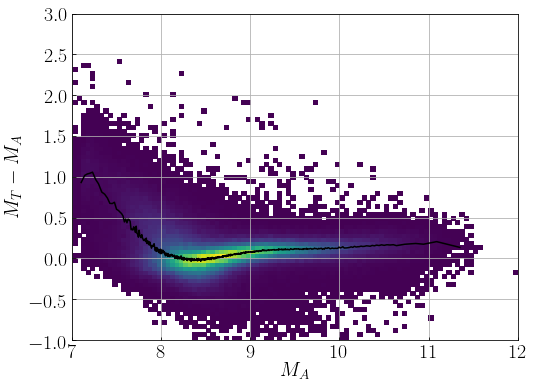

In [208]:
# cat_cut = cat[np.logical_and(cat['CLASS']<10,abs(cat['zKDEPeak_old']-cat['Z_BEST_BC03'])<0.05*cat['Z_BEST_BC03'])] 
cat_cut = cat[np.logical_and(cat['CLASS']<10,abs(cat['Z_BEST_BC03']-0.6)<0.3)] 
cat_cut = cat_cut[cat_cut['sfProb']>0.5]

fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))
x = np.array(cat_cut['MASS_MED_old'])
y = np.array(cat_cut['MASS_MED']-cat_cut['MASS_MED_old'])

y = y[np.logical_and(x>7,x<12)]
x = x[np.logical_and(x>7,x<12)]

x = x[np.logical_and(y>-3,y<3)]
y = y[np.logical_and(y>-3,y<3)]
x_list,y_median = median(x,y)

# # plot
plt.hist2d(x,y,bins=[100,100],cmin=0.1)
plt.plot(x_list,y_median,'k')

plt.xlim([7,12])
plt.ylim([-1,3])
plt.xlabel(r'$M_A$', fontsize=20)
plt.ylabel(r'$M_T-M_A$', fontsize=20)
plt.grid()
# plt.show(); plt.close()

### COSMOS2015 matched catalog (with all of Thibaud's objects)

no parameters from Anneya's catalog are included

In [252]:
cat = Table.read('CUT_deep_catalogs/matched_thibaud_COSMOS.fits')
# '_1' --old parameters
# '_2' --COSMOS parameters

/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


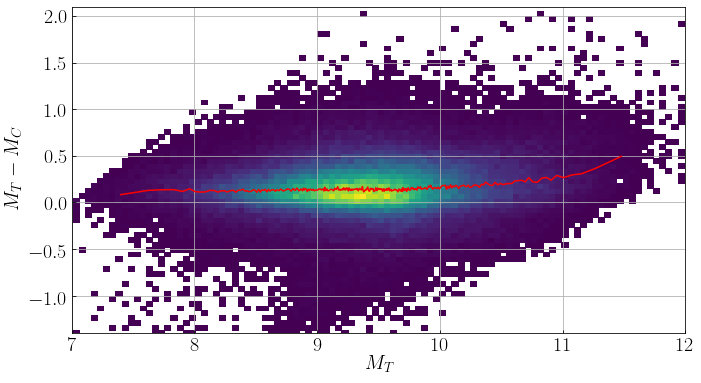

In [262]:
cat_cut = cat[np.logical_and(cat['CLASS_1']<10,abs(cat['ZPDF']-cat['Z_BEST_BC03'])<0.05*cat['Z_BEST_BC03'])] 

# cat_cut = cat[np.logical_and(cat['CLASS']<10,abs(cat['Z_BEST_BC03']-0.6)<0.3)] 
cat_cut = cat_cut[cat_cut['SSFR_BEST_1']>-11]

fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(11, 6))
x = np.array(cat_cut['MASS_MED_1'])
y = np.array(cat_cut['MASS_MED_1']-cat_cut['MASS_MED_2'])

y = y[np.logical_and(x>7,x<12)]
x = x[np.logical_and(x>7,x<12)]

x = x[np.logical_and(y>-3,y<3)]
y = y[np.logical_and(y>-3,y<3)]
x_list,y_median = median(x,y)

# # plot
plt.hist2d(x,y,bins=[100,100],cmin=0.1)
plt.plot(x_list,y_median,'r')

plt.xlim([7,12])
plt.ylim([-1.4,2.1])
plt.xlabel(r'$M_T$', fontsize=20)
plt.ylabel(r'$M_T-M_C$', fontsize=20)
plt.grid()
# plt.show(); plt.close()

### both-central catalogs
save catalogs for massive centrals that satisfy both old (M>11.15, zcut) and new (M>11.35,zcut) selection criteria, and also pass the isolation criteria using corresponding selection criteria

In [ ]:
cat_names = ['COSMOS_deep','ELAIS_deep', 'DEEP_deep','XMM-LSS_deep','SXDS_uddd']
for cat_name in cat_names:
    for z in [0.4,0.6,0.8]:
        full_name = 
        cat1 = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/')
        cat2 = Table.read()
        cat3 = Table(names=cat1.colnames, dtype=[str(y[0]) for x, y in cat1.dtype.fields.items()])

        for gal in cat1:
            if gal['NUMBER'] in cat2['NUMBER']:
                cat3.add_row(gal)
        
        if len(cat3) != 0:
            cat3.write(...)